# Nice example downloaded from cartopy gallery

In [1]:
%matplotlib inline



Hurricane Katrina
-----------------

This example uses the power of Shapely to illustrate states that are likely to
have been significantly impacted by Hurricane Katrina.




In [2]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader


def sample_data():
    """
    Return a list of latitudes and a list of longitudes (lons, lats)
    for Hurricane Katrina (2005).

    The data was originally sourced from the HURDAT2 dataset from AOML/NOAA:
    http://www.aoml.noaa.gov/hrd/hurdat/newhurdat-all.html on 14th Dec 2012.

    """
    lons = [-75.1, -75.7, -76.2, -76.5, -76.9, -77.7, -78.4, -79.0,
            -79.6, -80.1, -80.3, -81.3, -82.0, -82.6, -83.3, -84.0,
            -84.7, -85.3, -85.9, -86.7, -87.7, -88.6, -89.2, -89.6,
            -89.6, -89.6, -89.6, -89.6, -89.1, -88.6, -88.0, -87.0,
            -85.3, -82.9]

    lats = [23.1, 23.4, 23.8, 24.5, 25.4, 26.0, 26.1, 26.2, 26.2, 26.0,
            25.9, 25.4, 25.1, 24.9, 24.6, 24.4, 24.4, 24.5, 24.8, 25.2,
            25.7, 26.3, 27.2, 28.2, 29.3, 29.5, 30.2, 31.1, 32.6, 34.1,
            35.6, 37.0, 38.6, 40.1]

    return lons, lats

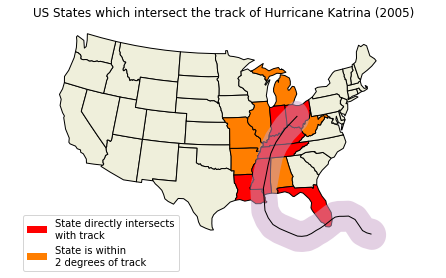

In [6]:
def main():
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

    ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

    shapename = 'admin_1_states_provinces_lakes_shp'
    states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)

    lons, lats = sample_data()

    # to get the effect of having just the states without a map "background"
    # turn off the outline and background patches
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)

    ax.set_title('US States which intersect the track of '
                 'Hurricane Katrina (2005)')

    # turn the lons and lats into a shapely LineString
    track = sgeom.LineString(zip(lons, lats))

    # buffer the linestring by two degrees (note: this is a non-physical
    # distance)
    track_buffer = track.buffer(2)

    def colorize_state(geometry):
        facecolor = (0.9375, 0.9375, 0.859375)
        if geometry.intersects(track):
            facecolor = 'red'
        elif geometry.intersects(track_buffer):
            facecolor = '#FF7E00'
        return {'facecolor': facecolor, 'edgecolor': 'black'}

    ax.add_geometries(
        shpreader.Reader(states_shp).geometries(),
        ccrs.PlateCarree(),
        styler=colorize_state)

    ax.add_geometries([track_buffer], ccrs.PlateCarree(),
                      facecolor='#C8A2C8', alpha=0.5)
    ax.add_geometries([track], ccrs.PlateCarree(),
                      facecolor='none', edgecolor='k')

    # make two proxy artists to add to a legend
    direct_hit = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
    within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")
    labels = ['State directly intersects\nwith track',
              'State is within \n2 degrees of track']
    ax.legend([direct_hit, within_2_deg], labels,
              loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)

    plt.show()


if __name__ == '__main__':
    main()